In [ ]:
import torch

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

from model import Encoder, Decoder
from data import FlagDataset
from utils import get_device

In [ ]:
DEVICE = get_device()
flag_dataset = FlagDataset("flags", device=DEVICE)

latent_size = 64
encoder = Encoder(128, latent_size=latent_size).to(DEVICE)
pre_flatten_size = encoder.pre_flatten_size
print(latent_size, pre_flatten_size)
decoder = Decoder(latent_size, pre_flatten_size).to(DEVICE)

encoder.load_state_dict(torch.load("encoder.pth", weights_only=True))
decoder.load_state_dict(torch.load("decoder.pth", weights_only=True))

In [ ]:
latent_flags = [encoder(flag[0].unsqueeze(0))[0].detach().cpu().numpy() for flag in flag_dataset]
countries = [flag[1] for flag in flag_dataset]

In [ ]:
pca = PCA(n_components=2)
pca_flags = pca.fit_transform(latent_flags)

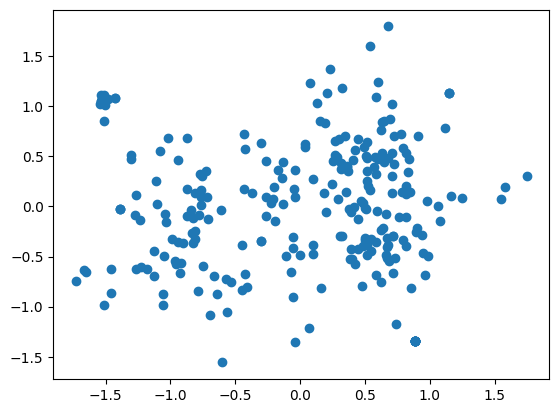

In [ ]:

plt.scatter(pca_flags[:, 0], pca_flags[:, 1])
sample_grid = 